In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from helpers import consts
from helpers.helpers import get_images, show_images, get_transformed_image_variants
from utils import delete_description_by_size, delete_description_auto, filter_image, plot_intensity_hist, morph_transfrom, detect_edges

## Read images from dir and convert them to Mat objs

In [2]:
images = get_images('./biofilm_formation_images')
image = images[8]

## Delete image description using fixed description size

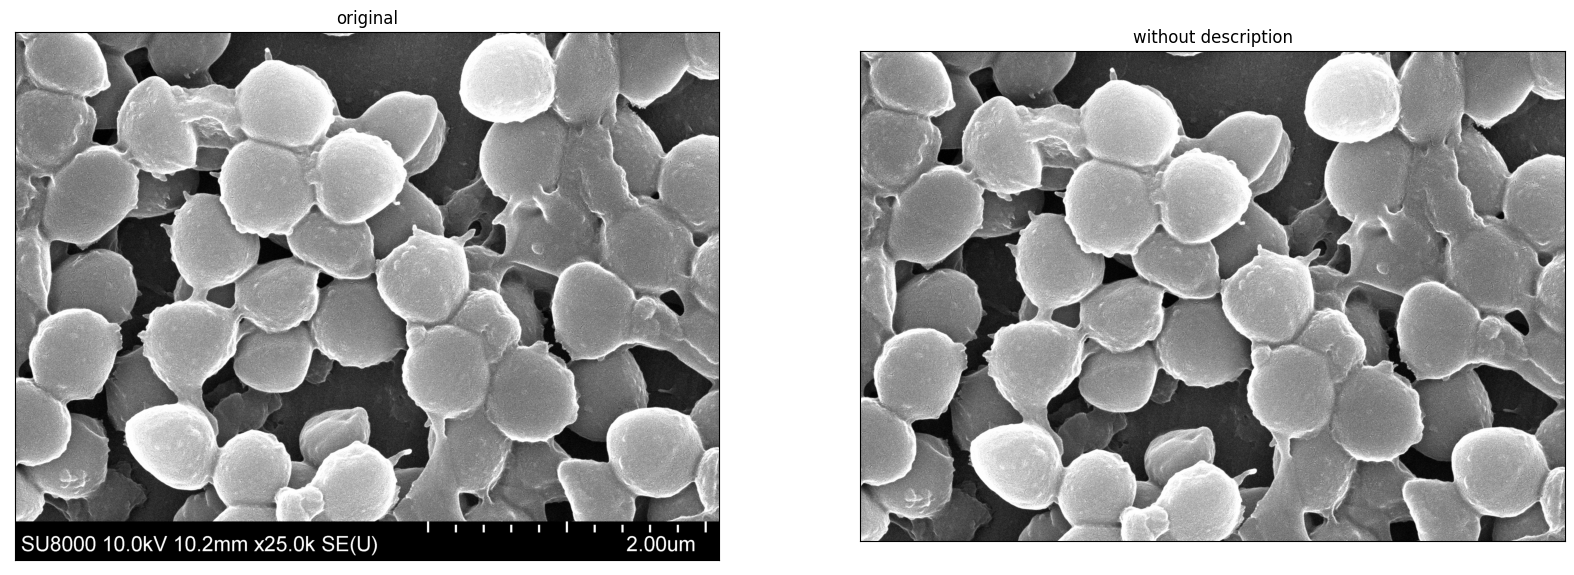

In [3]:
description_size = 140
image_withouth_description = delete_description_by_size(image, size=description_size)
show_images([
  {
    consts.IMAGE: image,
    consts.TITLE: 'original'
  },
  {
    consts.IMAGE: image_withouth_description,
    consts.TITLE: 'without description'
  }
])

## Pixels intensity hists

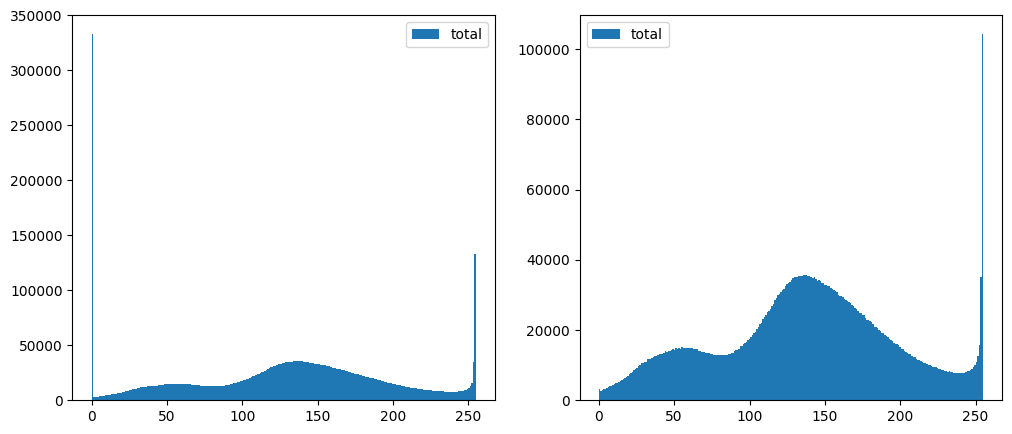

In [4]:
hists = plot_intensity_hist([image, image_withouth_description], figsize=(12, 5))

## Delete description using colors
idk is it a good idea to use prop that descr contains only 0, 255 pixels but it works :)

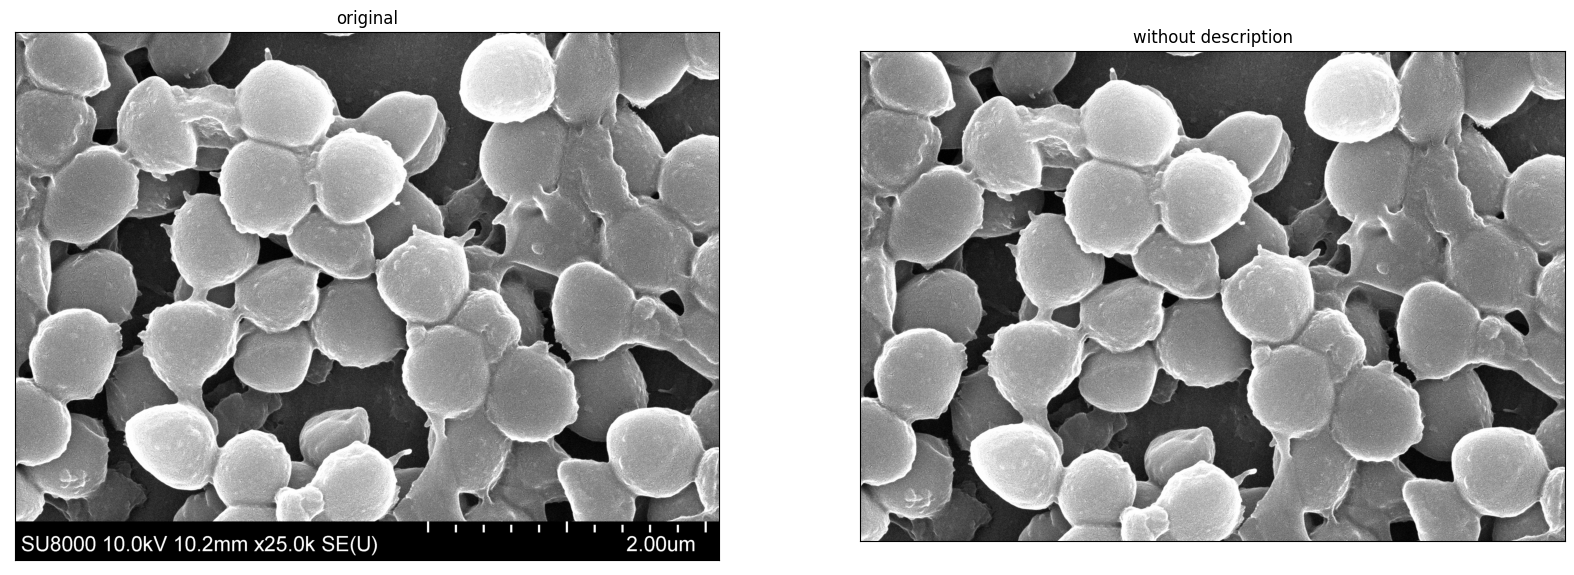

In [5]:
image_without_descr = delete_description_auto(image)
show_images([
  {
    consts.IMAGE: image,
    consts.TITLE: 'original'
  },
  {
    consts.IMAGE: image_without_descr,
    consts.TITLE: 'without description'
  }
])

## Intensity hists after transformation above
we can see that func above removed almost all black pixels

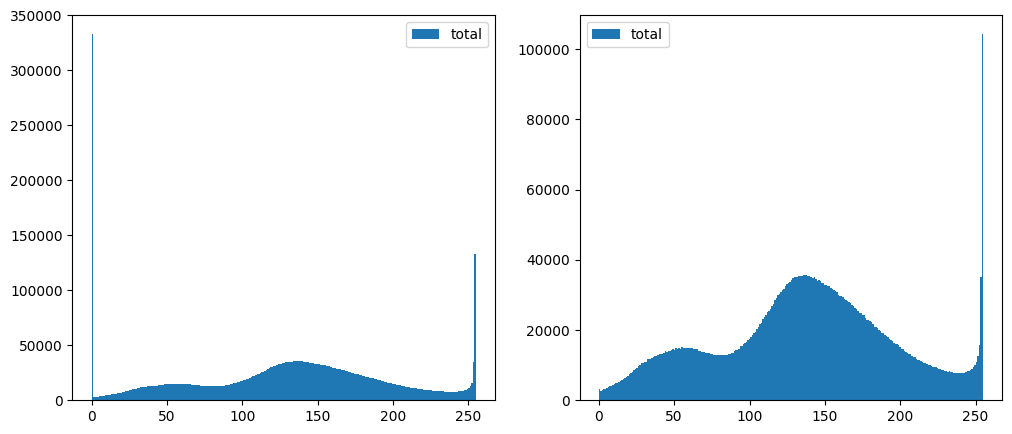

In [6]:
plots = plot_intensity_hist([image, image_without_descr], figsize=(12, 5))

## Blur image using Gaussian, Average and Median algs

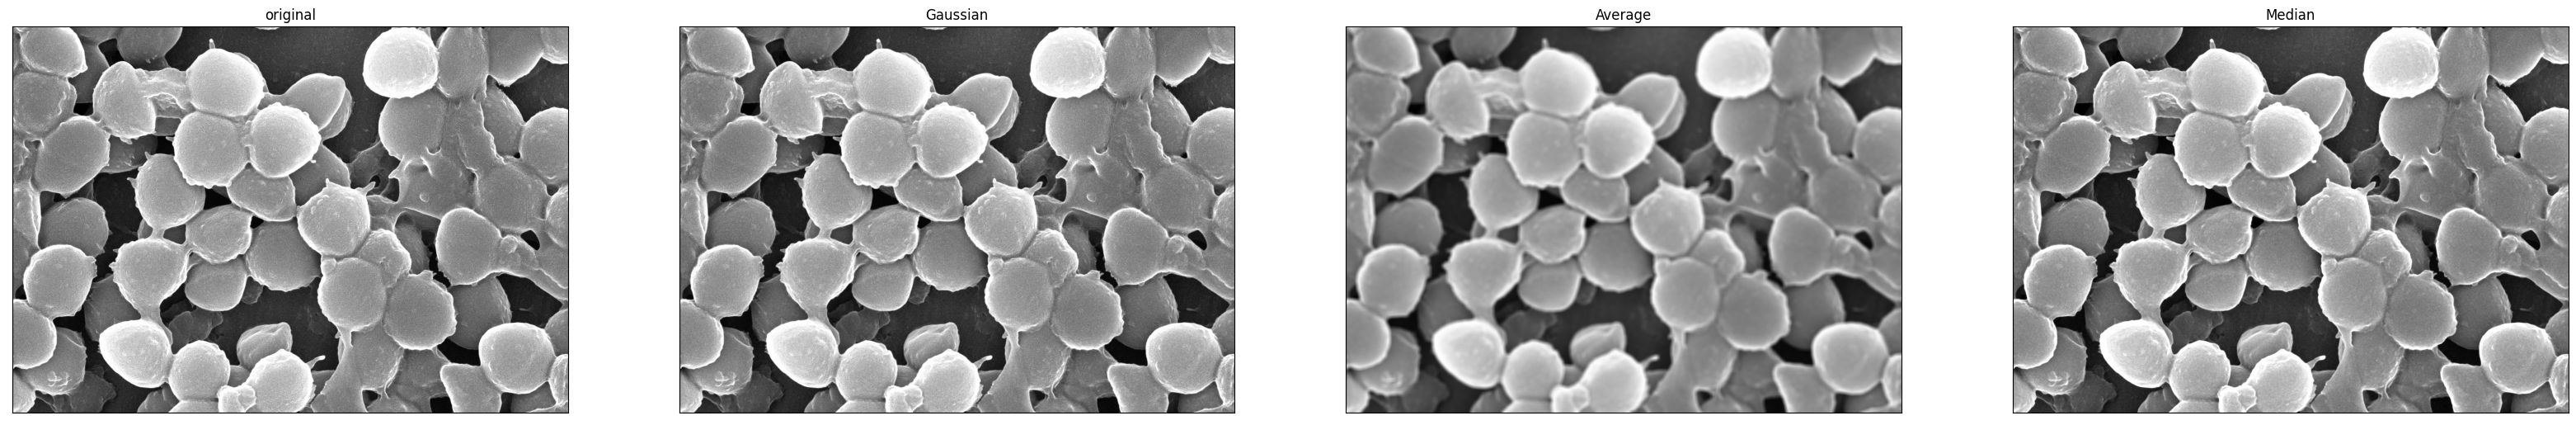

In [7]:
filters_data = [
    {
        consts.ALG: consts.GAUSSIAN,
    }, 
    {
        consts.ALG: consts.AVERAGE,
        consts.PARAMS: {'ksize': (20, 20)}
    },
    {
        consts.ALG: consts.MEDIAN,
    }
]
blurred_images = get_transformed_image_variants(image_withouth_description, filters_data, filter_image)
show_images([
    {
        consts.IMAGE: image_withouth_description,
        consts.TITLE: 'original'
    },
    *blurred_images
])

## Detect edges using Sobel and Canny algs

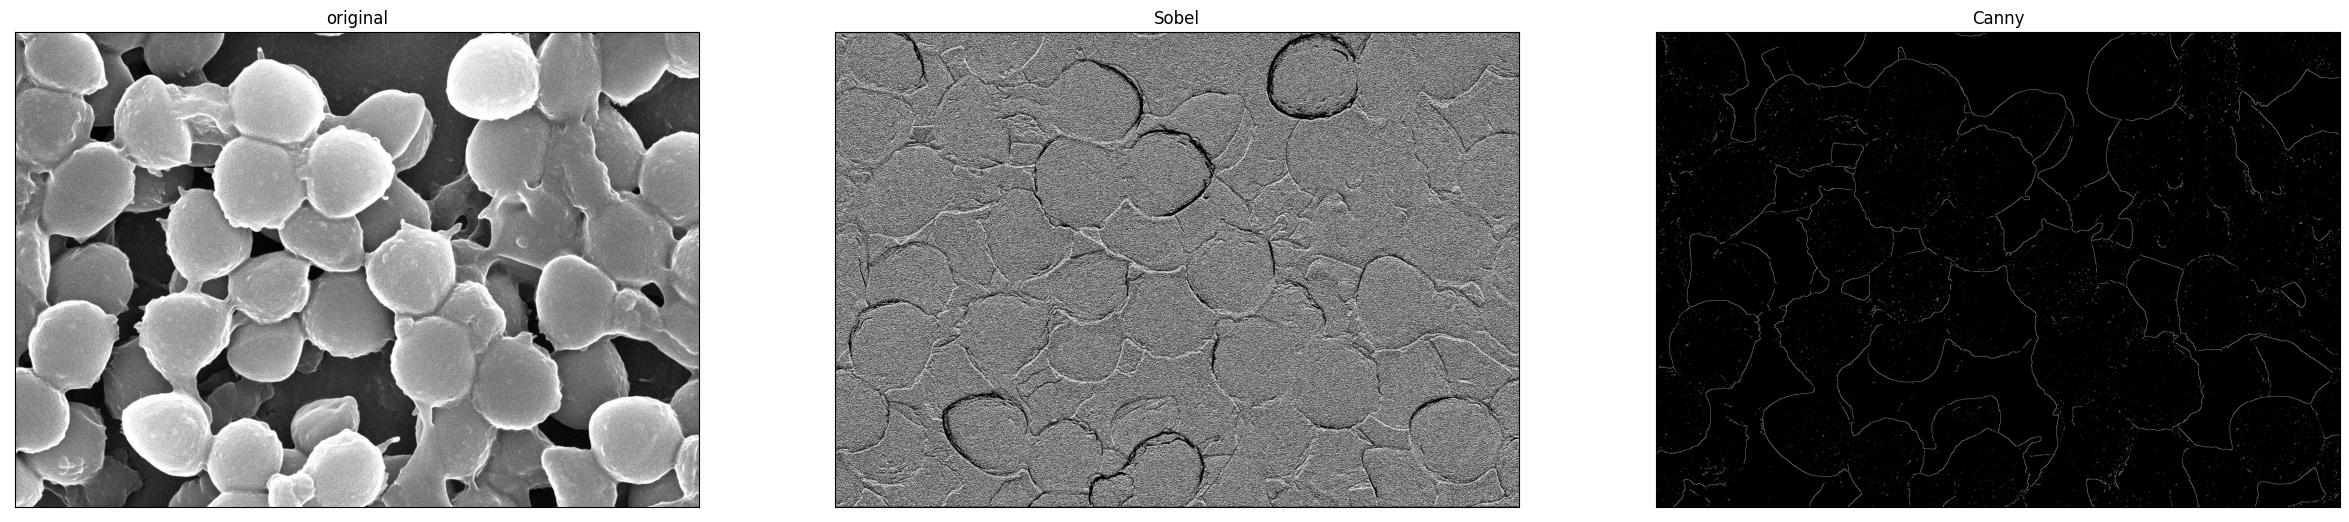

In [8]:
detect_edges_data = [
    {
        consts.ALG: consts.SOBEL,
        consts.PARAMS: {'ddepth': cv2.CV_32F, 'dx': 0, 'dy': 1, 'ksize': 1}
    },
    {
        consts.ALG: consts.CANNY,
        consts.PARAMS: {'threshold1': 330, 'threshold2': 330}
    }
]
transformed_by_egdes_detecting = get_transformed_image_variants(image_withouth_description, detect_edges_data, detect_edges)
show_images([
    {
        consts.IMAGE: image_withouth_description,
        consts.TITLE: 'original'
    },
    *transformed_by_egdes_detecting
])

canny_img = transformed_by_egdes_detecting[1][consts.IMAGE]

## Some experiments with morphological operations (Erosion, Dilation, Opening, Closing)
images names consits from algs names in order they was applied to them

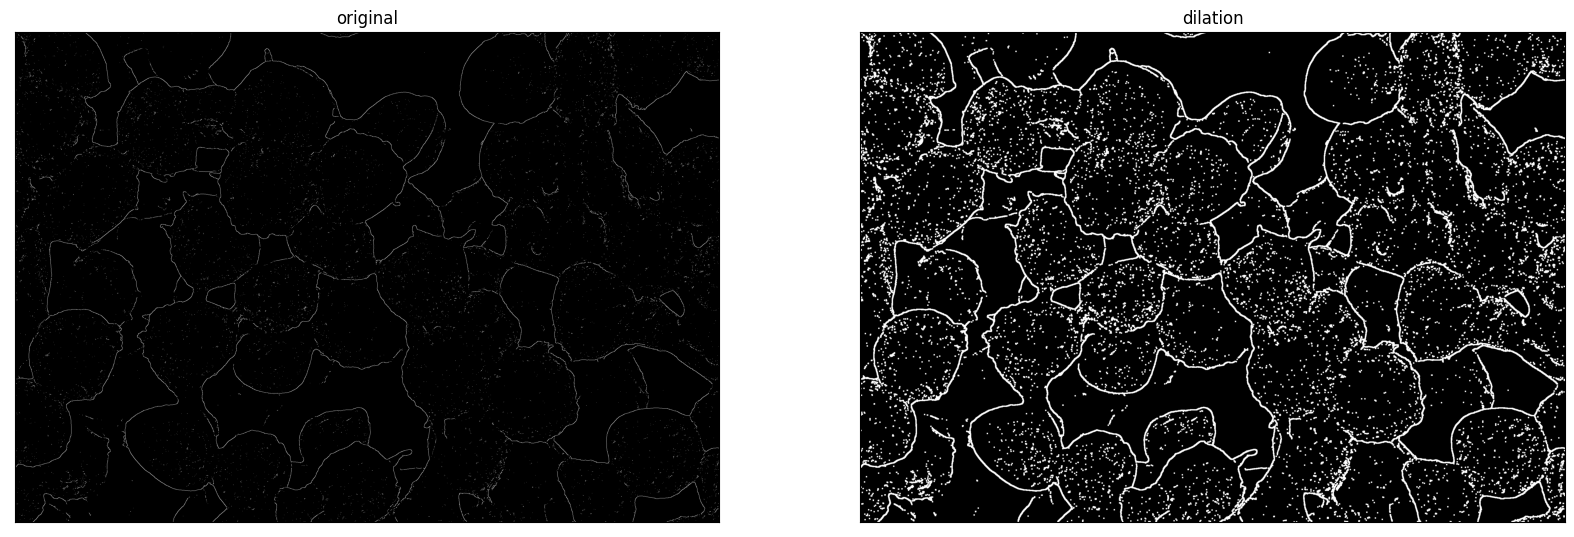

In [9]:
canny_dilation_img = morph_transfrom(
    image=canny_img,
    alg=consts.DILATION,
    kernel=np.ones((3, 3), np.uint8),
    iterations=2
)
show_images([
    {
        consts.IMAGE: canny_img,
        consts.TITLE: 'original'
    },
    {
        consts.IMAGE: canny_dilation_img,
        consts.TITLE: consts.DILATION
    }
])

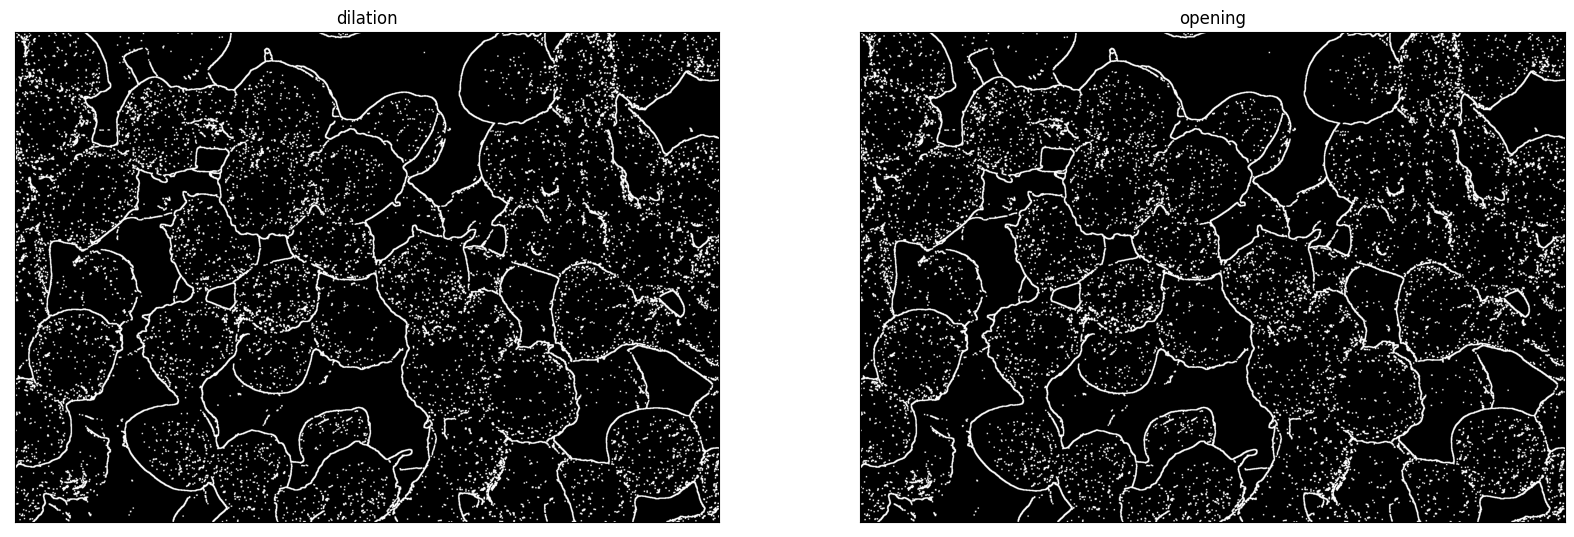

In [10]:
canny_dilation_opening_img = morph_transfrom(
    image=canny_dilation_img,
    alg=consts.OPENING, 
    kernel=np.ones((3, 3), np.uint8),
)
show_images([
    {
        consts.IMAGE: canny_dilation_img,
        consts.TITLE: consts.DILATION
    },
    {
        consts.IMAGE: canny_dilation_opening_img,
        consts.TITLE: consts.OPENING    
    }
])

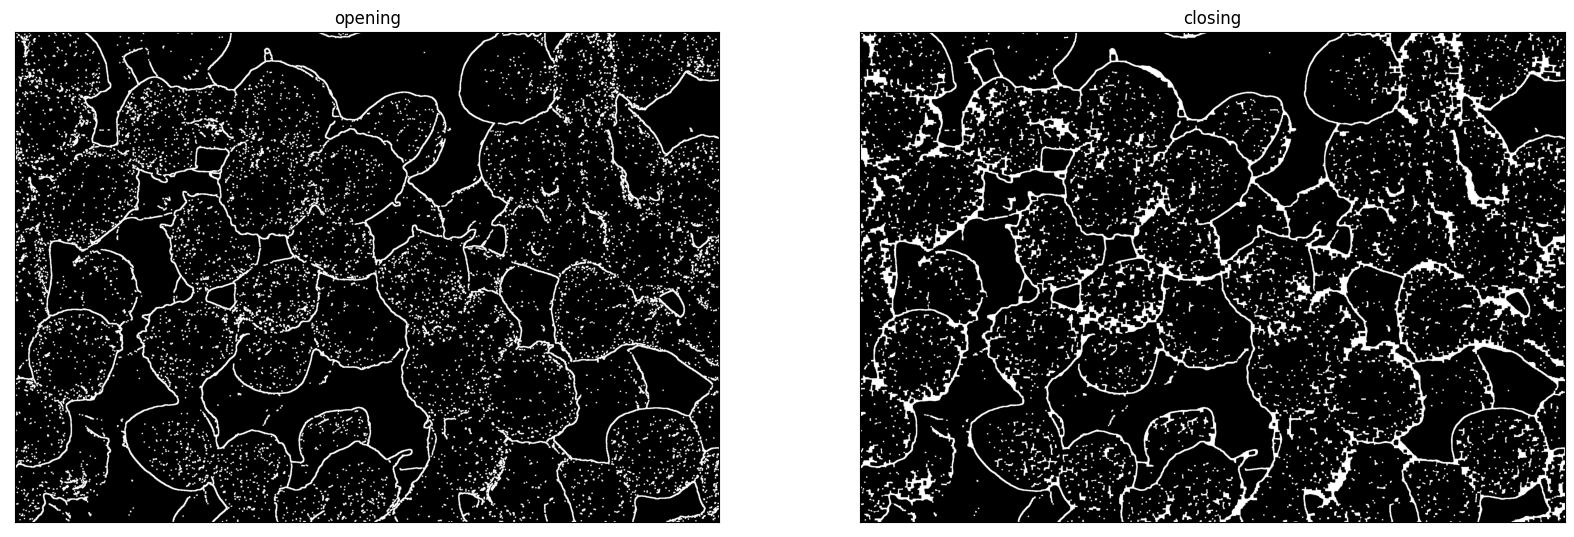

In [11]:
canny_dilation_opening_closing_img = morph_transfrom(
    image=canny_dilation_opening_img,
    alg=consts.CLOSING, 
    kernel=np.ones((10, 10), np.uint8),
)
show_images([
    {
        consts.IMAGE: canny_dilation_opening_img,
        consts.TITLE: consts.OPENING
    },
    {
        consts.IMAGE: canny_dilation_opening_closing_img,
        consts.TITLE: consts.CLOSING    
    }
])

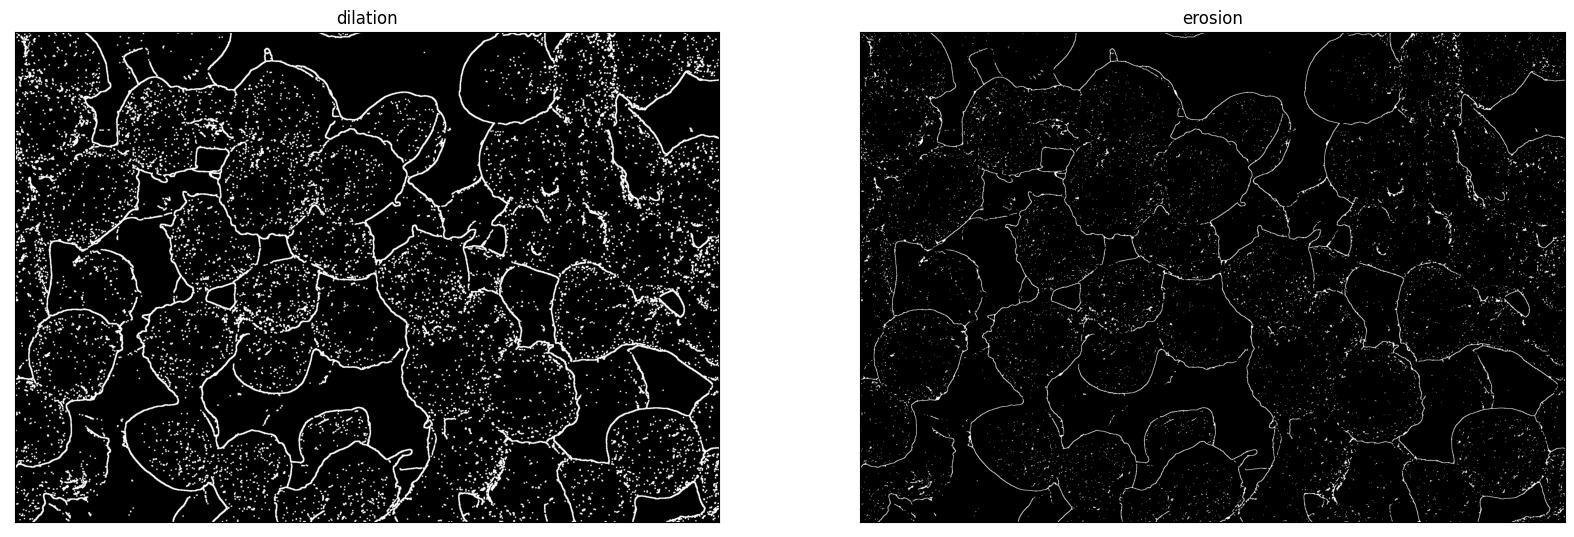

In [12]:
canny_dilation_erosion_img = morph_transfrom(
    image=canny_dilation_img,
    alg=consts.EROSION, 
    kernel=np.ones((4, 4), np.uint8),
    iterations=1
)
show_images([
    {
        consts.IMAGE: canny_dilation_img,
        consts.TITLE: consts.DILATION
    },
    {
        consts.IMAGE: canny_dilation_erosion_img,
        consts.TITLE: consts.EROSION    
    }
])

## Try detect circles

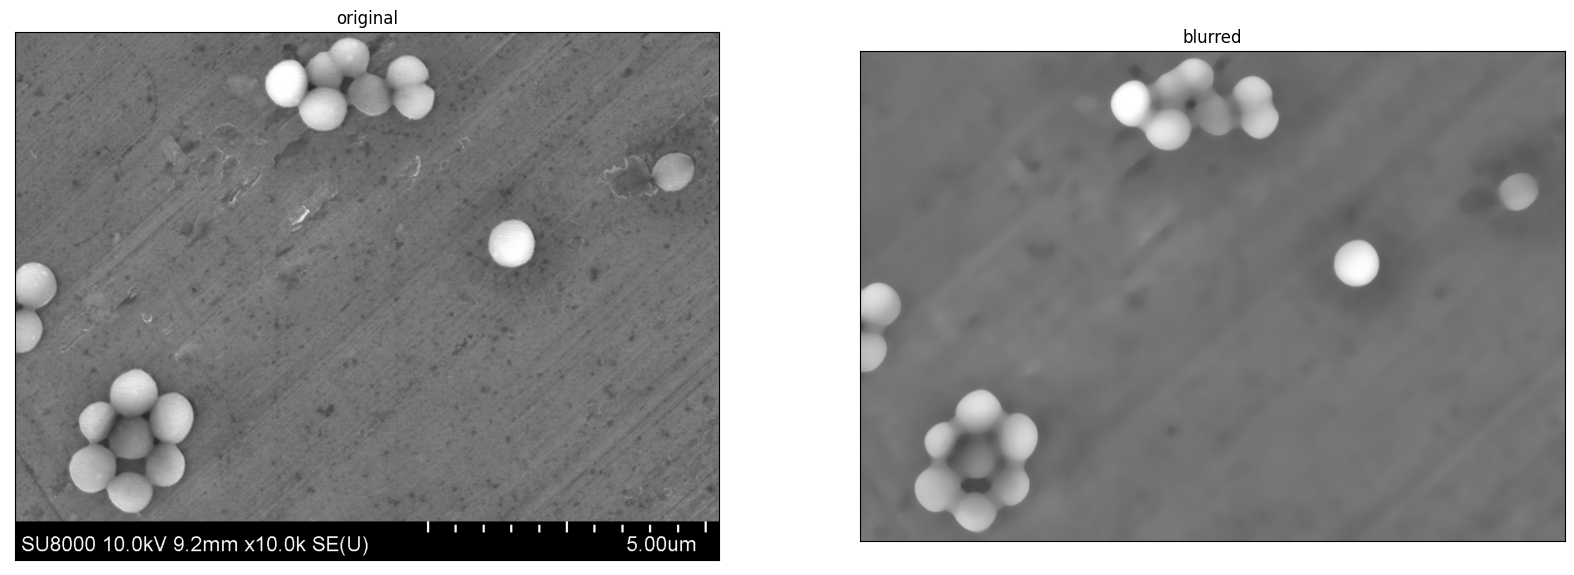

In [13]:
image_for_detect_circles = images[-5]
blurred_image = filter_image(
    image=delete_description_auto(image_for_detect_circles),
    alg=consts.MEDIAN,
    ksize=27
)
show_images([
    {
        consts.IMAGE: image_for_detect_circles,
        consts.TITLE: 'original',
    },
    {
        consts.IMAGE: blurred_image,
        consts.TITLE: 'blurred',
    }
])

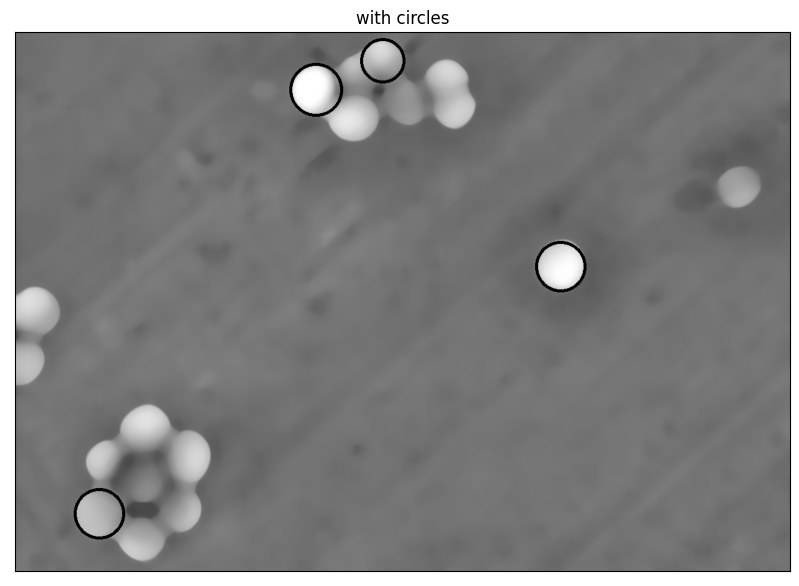

In [14]:
circles = cv2.HoughCircles(
    image=blurred_image, 
    method=cv2.HOUGH_GRADIENT, 
    dp=2, 
    minDist=30, 
    param1=200,
    param2=100
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(blurred_image, center, radius, (0, 255, 0), 3)
    show_images([
        {
            consts.TITLE: 'with circles',
            consts.IMAGE: blurred_image 
        }
    ])